# Characterize the cars dataset

Here I characterize the [cars dataset](http://ai.stanford.edu/~jkrause/cars/car_dataset.html)
based on the work done in [1_make_dataset_usable](1_make_dataset_usable.ipynb)

In [202]:
import os
import pickle

from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cars_utils

from PIL import Image

In [214]:
with open(os.path.join('data', 'notebooks', '1_make_dataset_usable', 'pair_dicto.pkl'), 'rb') as file:
    make_data_usable_dicto = pickle.load(file)

label_tuples = make_data_usable_dicto['label_tuples']

### Look at some images

In [204]:
IMAGE_PATH = os.path.join('data', 'cars_dataset', 'original', 'images')
save_dir = os.path.join('data', 'figures', '2_characterize_the_dataset')
if not os.path.isdir(save_path):
    os.mkdir(save_path)
image_names = os.listdir(IMAGE_PATH)
sorted_image_names = sorted(image_names)
print('sorted paths:', sorted_image_names[0:10])

sorted paths: ['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg']


In [ ]:
file_paths = [os.path.join(IMAGE_PATH, name) for name in image_names]

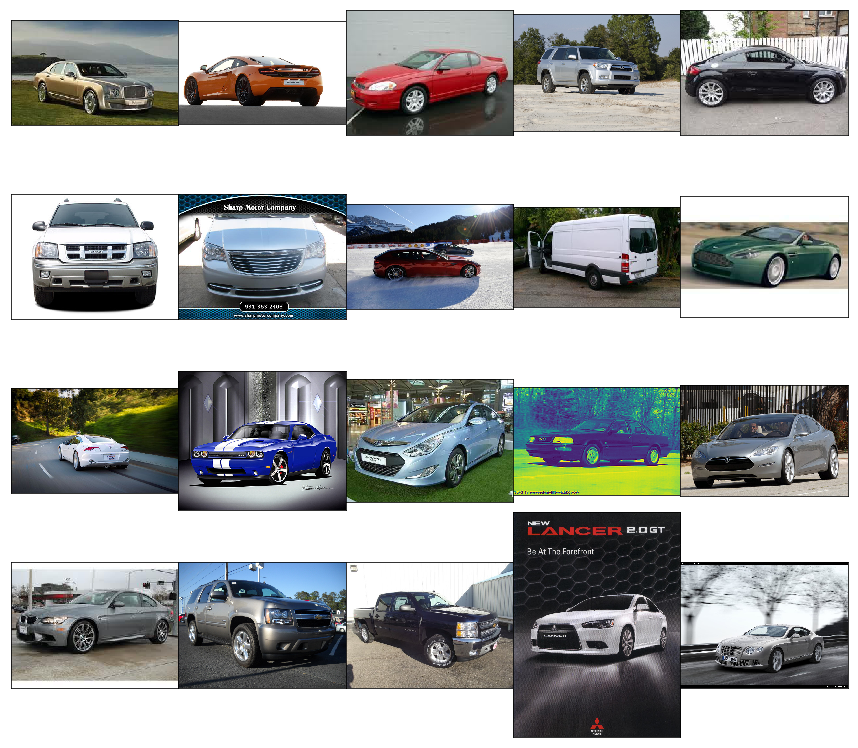

In [205]:
plt.close('all')
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(15, 15)
fig.subplots_adjust(wspace=0, hspace=-0.3)
axes = axes.reshape(-1)
for i, ax in enumerate(axes):
    img = plt.imread(file_paths[i])
    ax.imshow(img)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
fig.subplotpars
plt.show()

cars_utils.save_matplotlib_fig(fig, 'car_overview.png', save_dir)

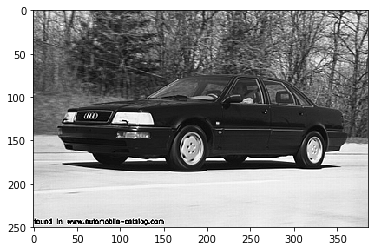

In [190]:
#Image 3 down and 4 over looks weird because its in greyscale
img = plt.imread(file_paths[13])
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

### Characterize makes and models in the dataset

In [9]:
df = pd.DataFrame(label_tuples, columns=['Make', 'Model', 'Year'] )

In [10]:
df.head()

,Make,Model,Year
0,AM,General_Hummer_SUV,2000
1,Acura,RL_Sedan,2012
2,Acura,TL_Sedan,2012
3,Acura,TL_Type_S,2008
4,Acura,TSX_Sedan,2012


In [11]:
df.describe()

,Make,Model,Year
count,196,196,196
unique,49,189,16
top,Chevrolet,Continental_GT_Coupe,2012
freq,22,2,117


In [212]:
df['Year'].astype(int).min()

1991

In [12]:
make_counts = df['Make'].value_counts()

In [62]:
chevys = df[df['Make']=='Chevrolet']
chevy_models = chevys['Model']
chevy_models_clean = chevy_models.apply(lambda x: x.split('_')[0])
chevy_models_clean_counts = chevy_models_clean.value_counts()

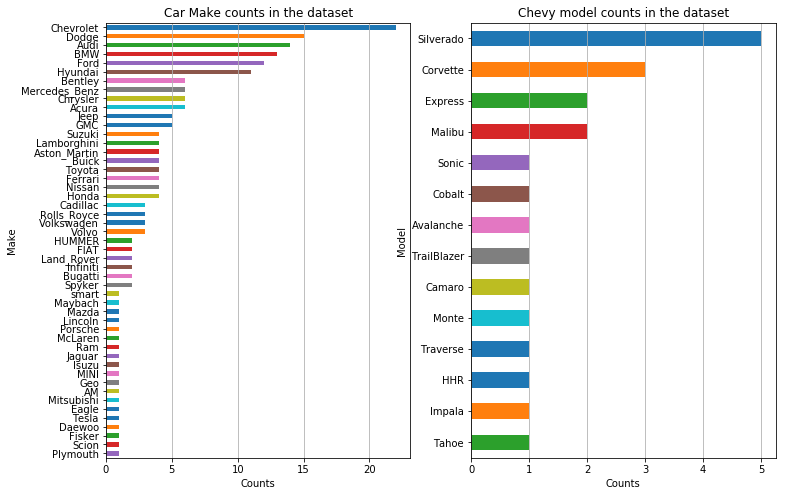

In [213]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,8)

make_counts.plot.barh(ax=ax1)
ax1.set_title('Car Make counts in the dataset')
ax1.set_xlabel('Counts')
ax1.set_ylabel('Make')
ax1.invert_yaxis()
ax1.grid(which='major', axis='x')

chevy_models_clean_counts.plot.barh(ax=ax2)
ax2.set_title('Chevy model counts in the dataset')
ax2.set_xlabel('Counts')
ax2.set_ylabel('Model')
ax2.invert_yaxis()
ax2.grid(which='major', axis='x')

plt.show()

cars_utils.save_matplotlib_fig(fig, 'count_hbars.png', save_dir)

In [206]:
silveradoes = chevys[chevys['Model'].str.contains('Silverado')]
silveradoes

,Make,Model,Year
53,Chevrolet,Silverado_1500_Hybrid_Crew_Cab,2012
68,Chevrolet,Silverado_2500HD_Regular_Cab,2012
69,Chevrolet,Silverado_1500_Classic_Extended_Cab,2007
73,Chevrolet,Silverado_1500_Extended_Cab,2012
74,Chevrolet,Silverado_1500_Regular_Cab,2012


### Characterize image shapes in dataset

In [163]:
hs = []
ws = []
rs = []
for name in sorted_image_names:
    temp_path = os.path.join(IMAGE_PATH, name)
    temp_img = Image.open(temp_path)
    ws.append(temp_img.size[0])
    hs.append(temp_img.size[1])
    rs.append(temp_img.size[0]/temp_img.size[1])

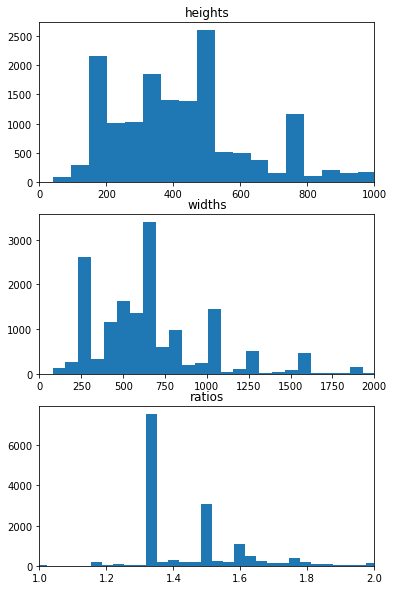

In [166]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.hist(hs, 100)
ax1.set_title('heights')
ax1.set_xlim(0,1000)
ax2.hist(ws, 100)
ax2.set_xlim(0, 2000)
ax2.set_title('widths')
ax3.hist(rs, 100)
ax3.set_title('ratios')
fig.set_size_inches(6, 10)
ax3.set_xlim(1, 2)
plt.show()

In [167]:
c_hs = Counter(hs)
c_ws = Counter(ws)
c_rs = Counter(rs)

print('top heights (value, count):', c_hs.most_common(3))
print('top widths:', c_ws.most_common(3))
print('top ratios:', c_rs.most_common(3))

top heights (value, count): [(480, 2049), (768, 967), (194, 861)]
top widths: [(640, 2606), (1024, 1369), (300, 948)]
top ratios: [(1.3333333333333333, 5723), (1.3350515463917525, 815), (1.5, 557)]
